In [1]:
%pylab inline
import pickle
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.utils import shuffle

Populating the interactive namespace from numpy and matplotlib


In [2]:
mnist = fetch_mldata('MNIST original', data_home=".")

In [3]:
mnist["data"].shape

(70000, 784)

In [4]:
size = 50
N = size * size
data, target = shuffle(mnist["data"], mnist["target"], random_state=777, n_samples=N)

In [5]:
data_100 = PCA(n_components=100).fit_transform(data.astype(float32) / 255)
embeddings = TSNE(init="pca", random_state=777, verbose=2).fit_transform(data_100)
embeddings -= embeddings.min(axis=0)
embeddings /= embeddings.max(axis=0)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 2500
[t-SNE] Computed conditional probabilities for sample 2000 / 2500
[t-SNE] Computed conditional probabilities for sample 2500 / 2500
[t-SNE] Mean sigma: 2.333508
[t-SNE] Iteration 25: error = 1.6847754, gradient norm = 0.0033275
[t-SNE] Iteration 50: error = 1.6219811, gradient norm = 0.0028974
[t-SNE] Iteration 75: error = 1.3828510, gradient norm = 0.0016649
[t-SNE] Iteration 100: error = 1.3291755, gradient norm = 0.0014430
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.329175
[t-SNE] Iteration 125: error = 1.2403653, gradient norm = 0.0011032
[t-SNE] Iteration 150: error = 1.2138489, gradient norm = 0.0010174
[t-SNE] Iteration 175: error = 1.2071781, gradient norm = 0.0009928
[t-SNE] Iteration 175: gradient norm 0.000993. Finished.
[t-SNE] Error after 175 iterations: 1.329175


([], <a list of 0 Text yticklabel objects>)

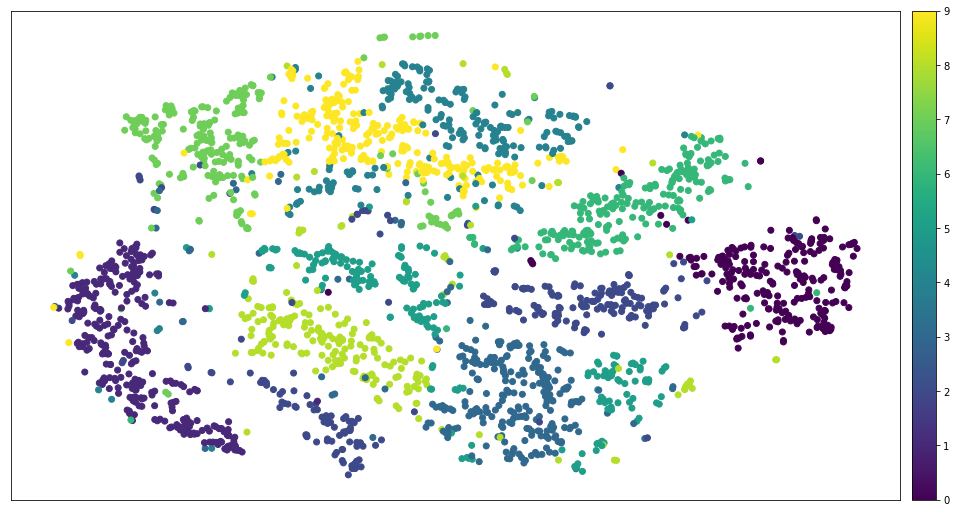

In [6]:
rcParams["figure.figsize"] = (17, 9)
scatter(embeddings[:, 0], embeddings[:, 1], c=target)
my_colorbar = colorbar(fraction=0.05, pad = 0.0125)
xticks([]); yticks([])

([], <a list of 0 Text yticklabel objects>)

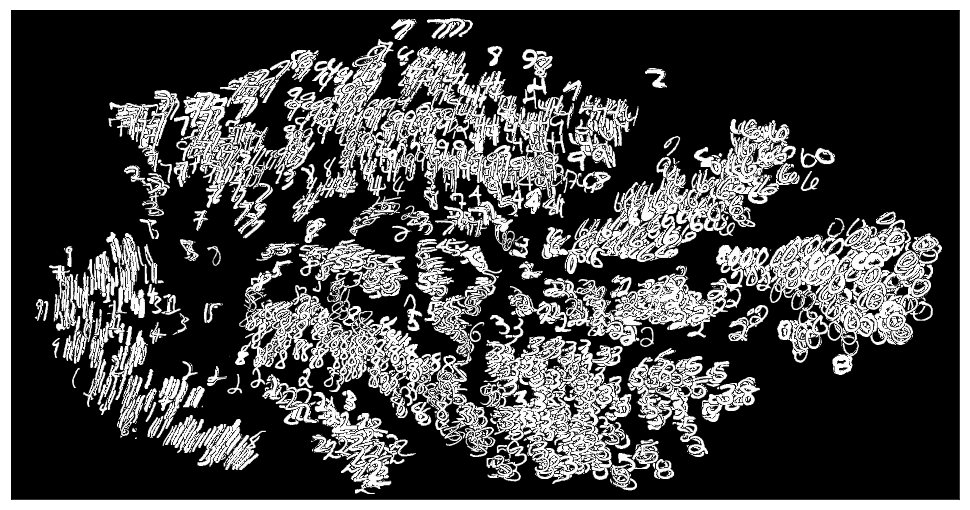

In [7]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

gca().set_facecolor("black")
rcParams["figure.figsize"] = (16, 9)
for pos, img in zip(embeddings, data):
    img = img.reshape(28, 28)
    img = stack((img, img, img, ones((28, 28), dtype=uint8) * 255), axis=-1)
    img[img[:, :, 0] == 0] = 0
    ab = AnnotationBbox(OffsetImage(img), 0.03 + pos * 0.94, xycoords="axes fraction", frameon=False)
    gca().add_artist(ab)
xticks([]); yticks([])

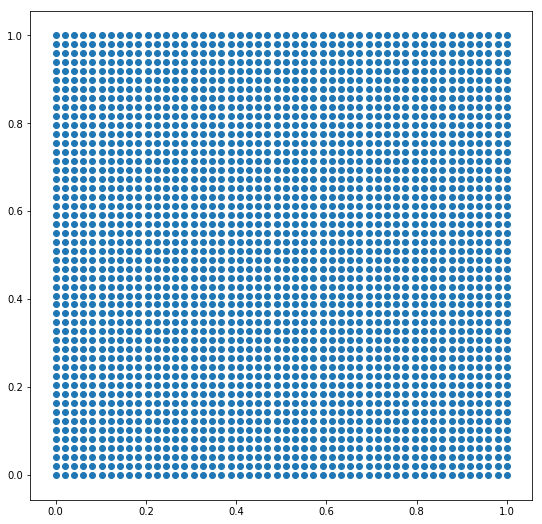

In [8]:
from scipy.spatial.distance import cdist
grid = dstack(meshgrid(linspace(0, 1, size), linspace(0, 1, size))).reshape(-1, 2)
rcParams["figure.figsize"] = (9, 9)
scatter(grid[:,0], grid[:,1])

In [9]:
from lapjv import lapjv

cost_matrix = cdist(grid, embeddings, "sqeuclidean").astype(float32)
cost_matrix = cost_matrix * (100000 / cost_matrix.max())
%time row_asses, col_asses, _ = lapjv(cost_matrix)

CPU times: user 14.9 s, sys: 0 ns, total: 14.9 s
Wall time: 14.9 s


([], <a list of 0 Text yticklabel objects>)

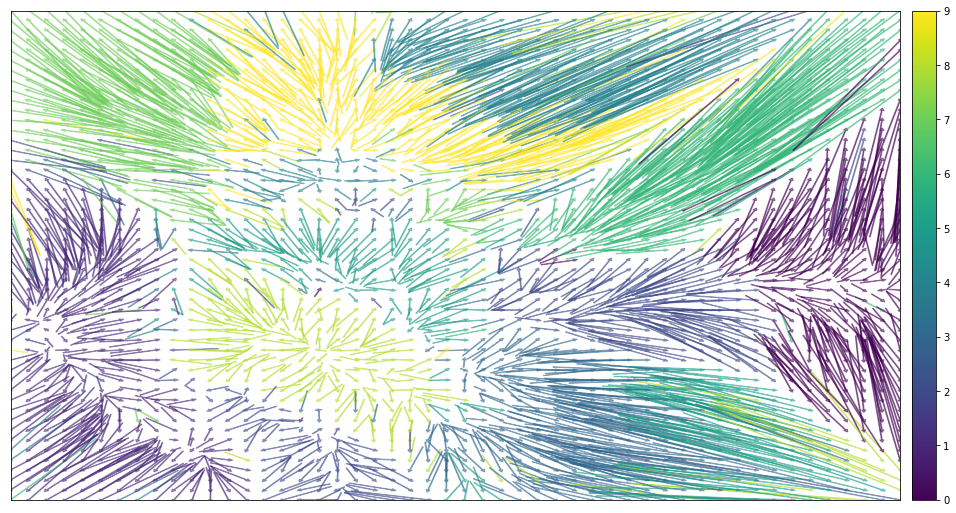

In [10]:
grid_jv = grid[col_asses]
pp_cmap = cm.get_cmap(rcParams["image.cmap"])
rcParams["figure.figsize"] = (17, 9)
for start, end, t in zip(embeddings, grid_jv, target):
    arrow(start[0], start[1], end[0] - start[0], end[1] - start[1],
          head_length=0.005, head_width=0.005, color=pp_cmap(t / 9), alpha=0.5)
colorbar(my_colorbar.mappable, fraction=0.05, pad = 0.0125)
xticks([]); yticks([])

([], <a list of 0 Text yticklabel objects>)

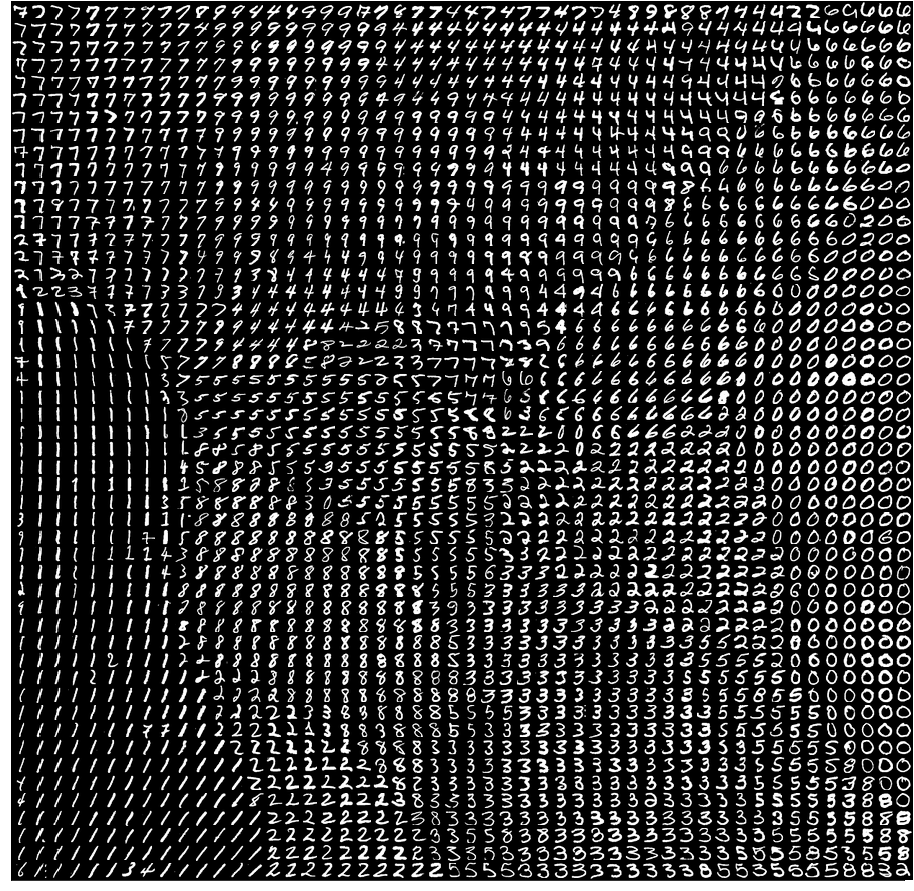

In [11]:
from PIL import Image

rcParams["figure.figsize"] = (16, 16)
gca().set_facecolor("black")
for pos, img in zip(grid_jv, data):
    img = Image.fromarray(255 - img.reshape(28, 28)).resize((20, 20), Image.ANTIALIAS)
    ab = AnnotationBbox(OffsetImage(img, cmap="Greys"),
                        pos * (size - 1) * 28, xycoords="data", frameon=False, box_alignment=(0, 0))
    gca().add_artist(ab)
xlim(0, (size - 1) * 28 + 16); ylim(0, (size - 1) * 28 + 16)
xticks([]); yticks([])